# Applied ML 2020 HW1

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## 0. Load data

In [2]:
data = pd.read_csv('../data/archive/fire_nrt_V1_96617.csv')
data.shape

(956257, 14)

In [3]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


## Task 1 
Plot the longitude vs latitude several ways within a single figure (each in its own axes):

### 1.0 Subsample dataset for 4th plot 

We need get sample from dataset for plotting with smaller amount of observations. Let's try to build several plot with different quantity of observations to understand difference

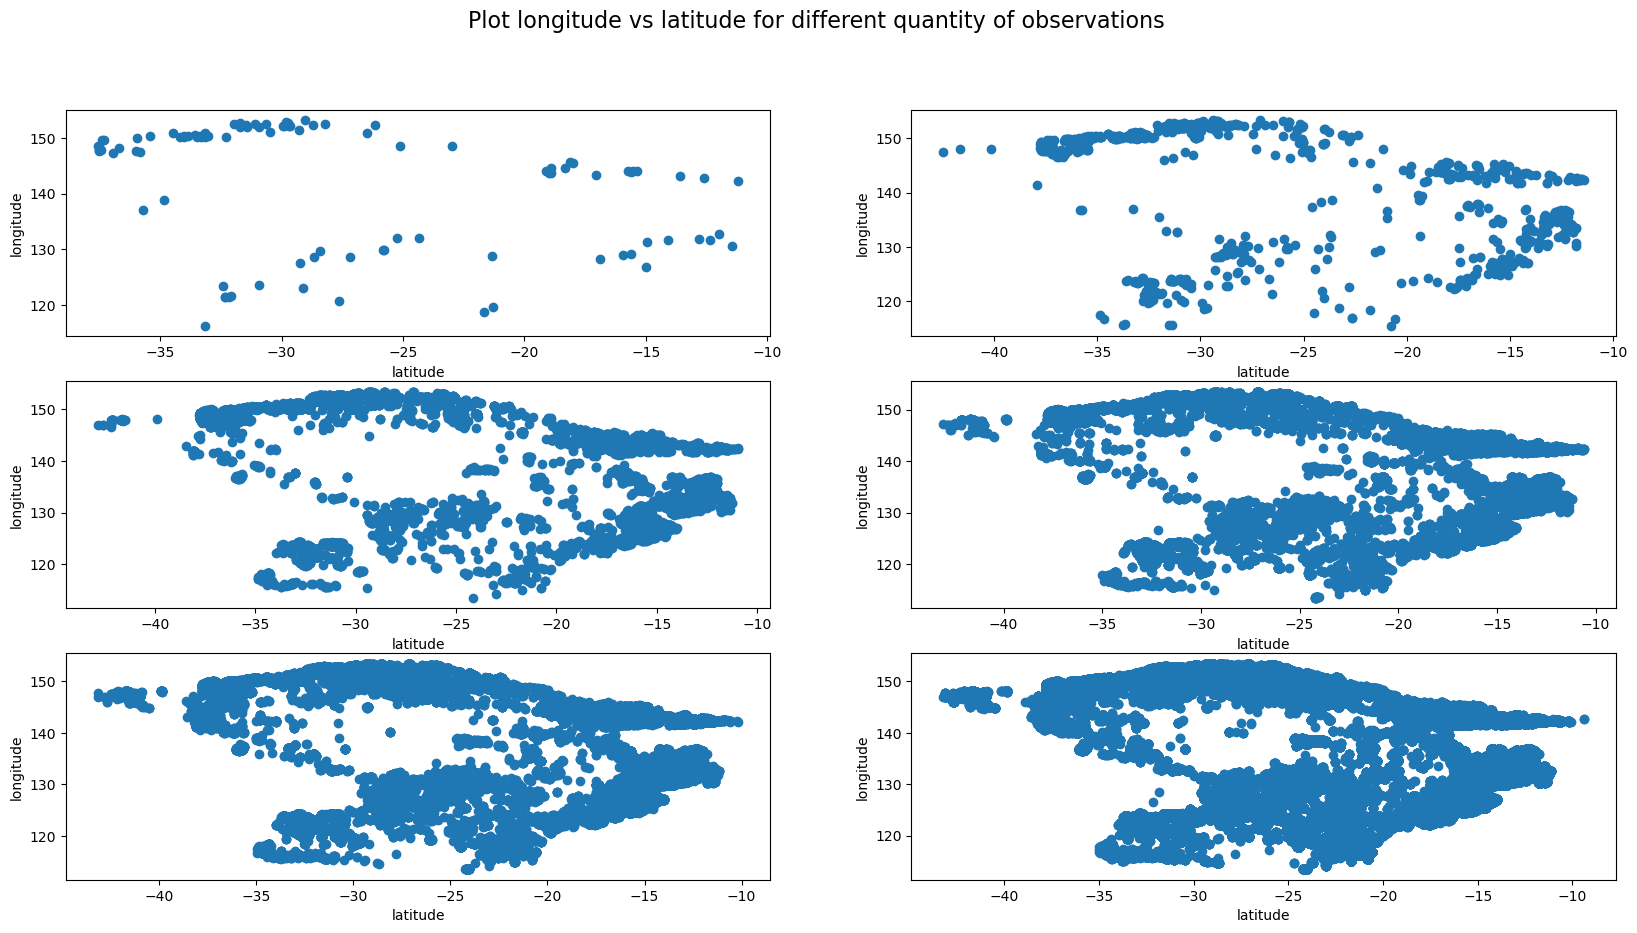

In [18]:
nrow = 3
ncol = 2
n = [100, 1000, 10000, 50000, 100000, 900000]
np.random.seed(0)

fig, ax = plt.subplots(nrow, ncol, figsize=(20, 10))
fig.suptitle('Plot longitude vs latitude for different quantity of observations', fontsize=16)
for i in range(nrow):
    for j in range(ncol):  
        data2 = data.loc[np.random.choice(data.index, n[i * ncol + j], replace=False)]
        ax[i,j].scatter(data2.latitude, data2.longitude)
        ax[i,j].set_xlabel('latitude')
        ax[i,j].set_ylabel('longitude')

As we see from 1.1, plot with n=1000 describes main tendency in the data

### 1.1 Using the matplotlib defaults.


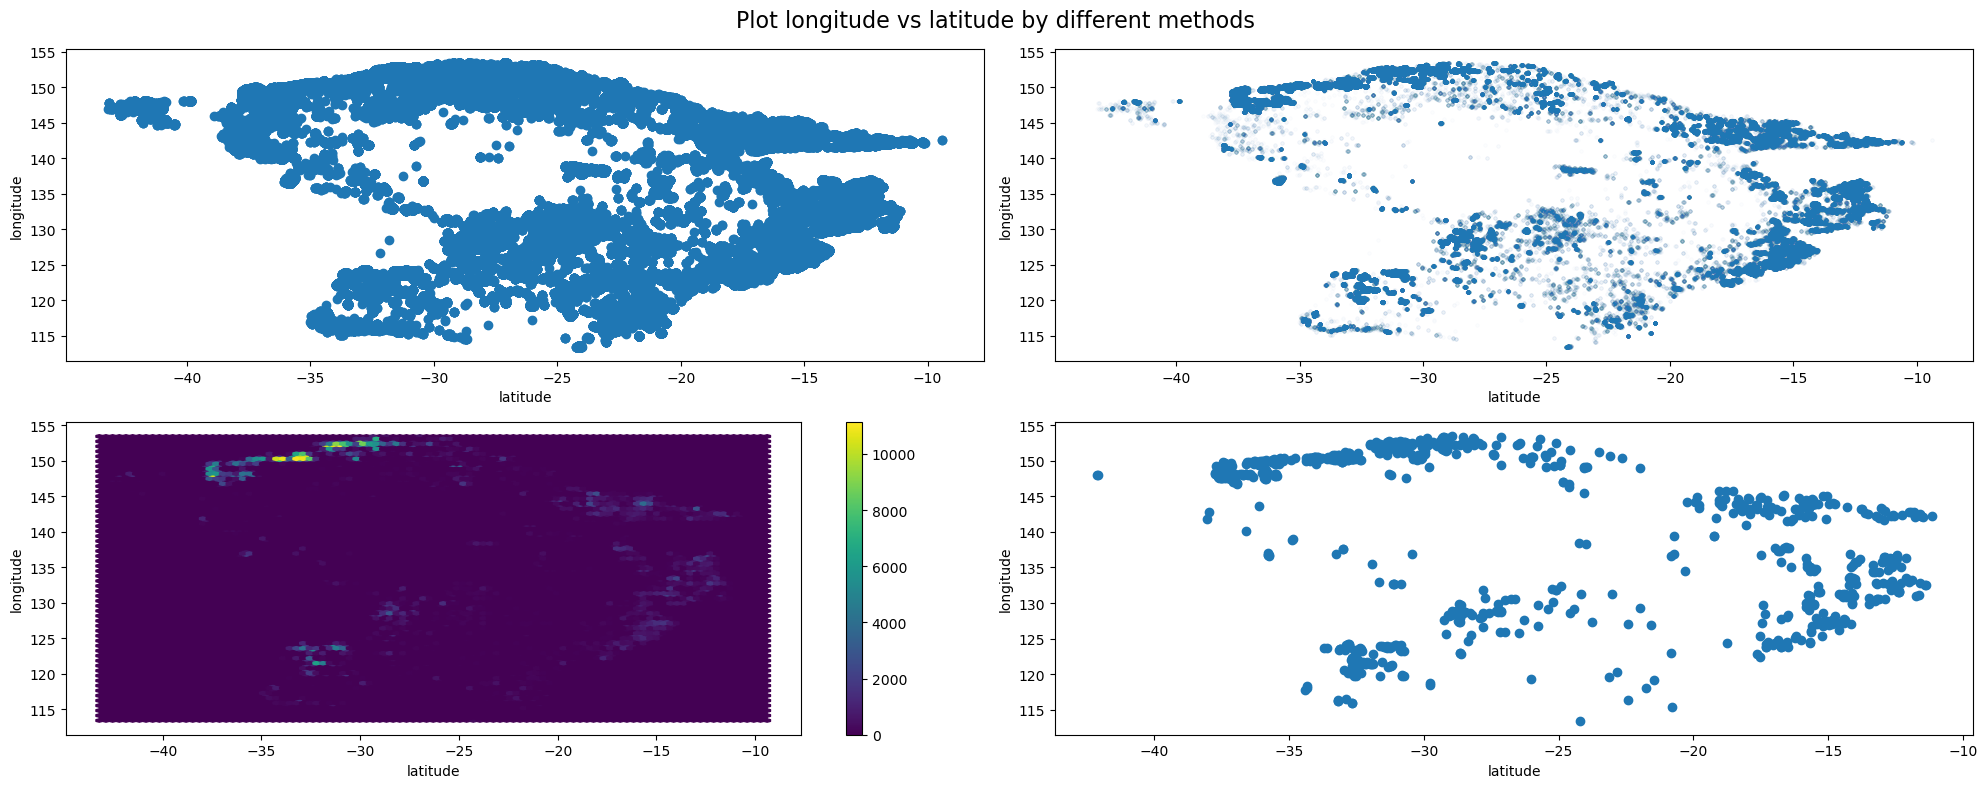

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.suptitle('Plot longitude vs latitude by different methods', fontsize=16)
ax[0,0].scatter(data.latitude, data.longitude)
ax[0,0].set_xlabel('latitude')
ax[0,0].set_ylabel('longitude')

ax[0,1].scatter(data.latitude, data.longitude, alpha=0.01, s=7)
ax[0,1].set_xlabel('latitude')
ax[0,1].set_ylabel('longitude')

im = ax[1,0].hexbin(data.latitude, data.longitude)
ax[1,0].set_xlabel('latitude')
ax[1,0].set_ylabel('longitude')
plt.colorbar(im, ax=ax[1, 0])

data2 = data.loc[np.random.choice(data.index, 1000, replace=False)]
ax[1,1].scatter(data2.latitude, data2.longitude)
ax[1,1].set_xlabel('latitude')
ax[1,1].set_ylabel('longitude')
plt.tight_layout()

### 1.2 In what areas are most of the anomalies (measurements) located?

Most of anomalies are in area where latitude is in (-35;-30) and longitude is in (145;155)

## Task 2

### 2.1
Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs
long for those points with brightness saturated and a separate for those who are not (within the
same figure on separate axes). You can pick any of the methods from 1.1 that you find most
suitable. Can you spot differences in the distributions?

In [6]:
data.bright_ti4.describe()

count    956257.000000
mean        333.922148
std          21.988456
min         208.000000
25%         312.800000
50%         336.700000
75%         351.000000
max         367.000000
Name: bright_ti4, dtype: float64

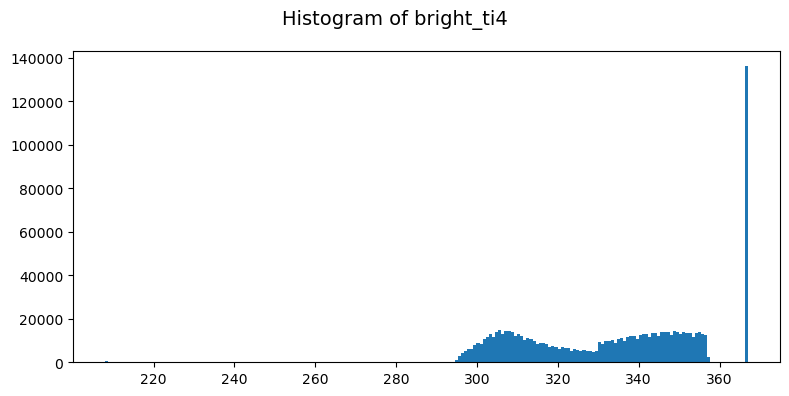

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.suptitle('Histogram of bright_ti4', fontsize=14)
ax.hist(data.bright_ti4, bins='auto')
plt.tight_layout()

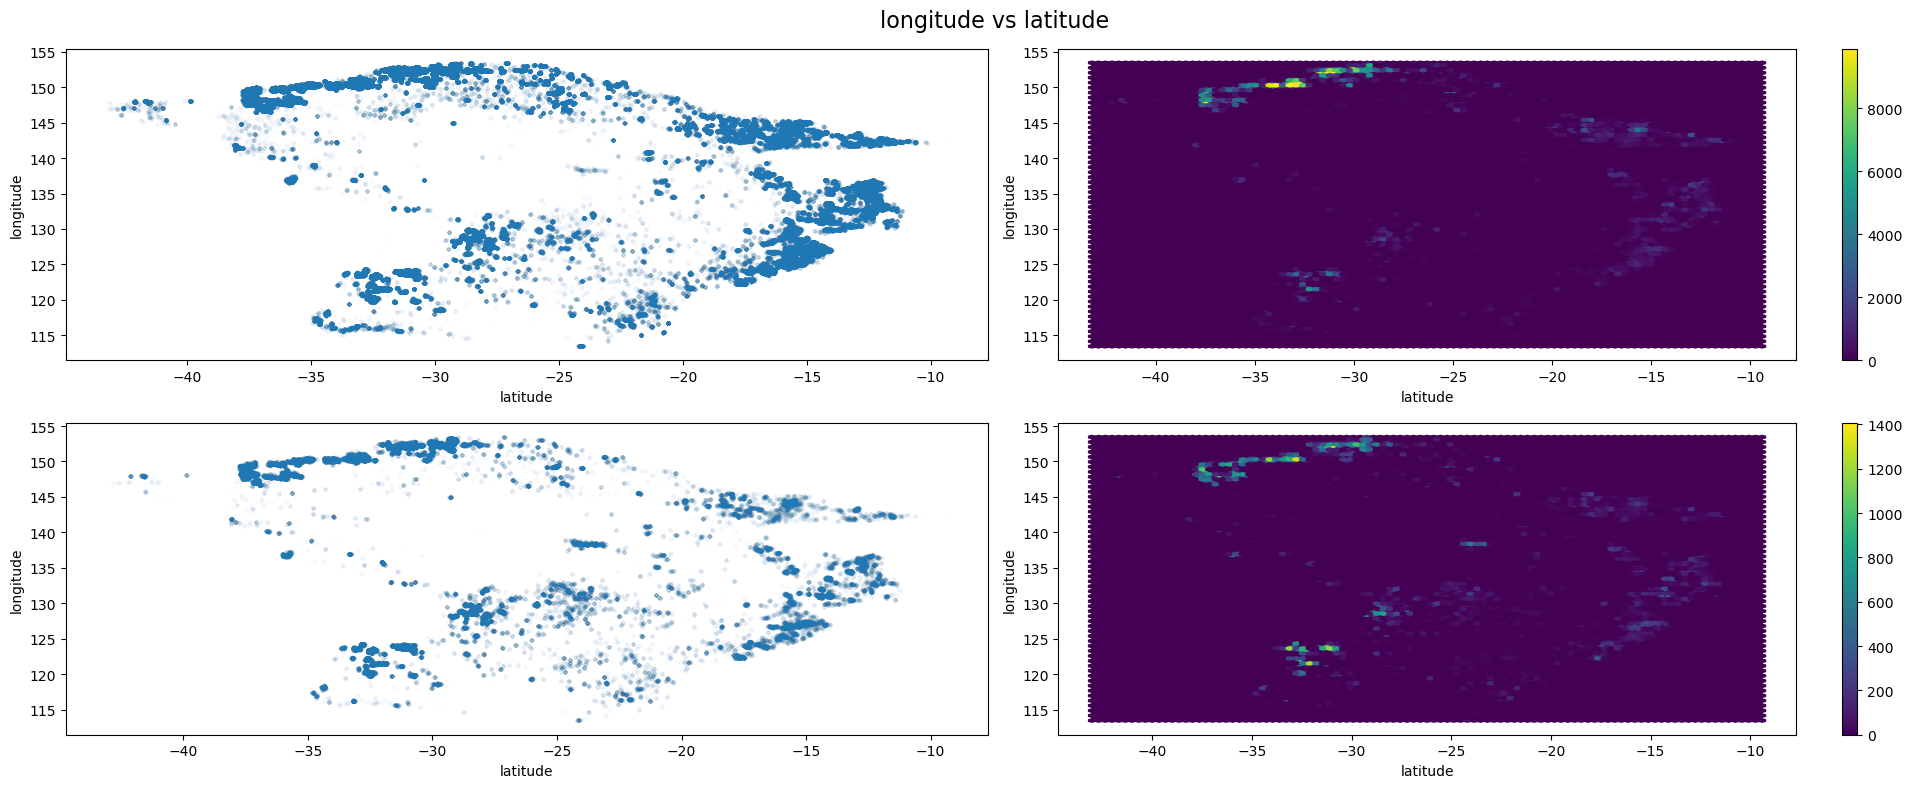

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.suptitle('longitude vs latitude', fontsize=16)

data1 = data.loc[data.bright_ti4 < 360].copy()
ax[0,0].scatter(data1.latitude, data1.longitude, alpha=0.01, s=7)
ax[0,0].set_xlabel('latitude')
ax[0,0].set_ylabel('longitude')

im = ax[0,1].hexbin(data1.latitude, data1.longitude)
ax[0,1].set_xlabel('latitude')
ax[0,1].set_ylabel('longitude')
plt.colorbar(im, ax=ax[0, 1])

data2 = data.loc[data.bright_ti4 > 360].copy()
ax[1,0].scatter(data2.latitude, data2.longitude, alpha=0.01, s=7)
ax[1,0].set_xlabel('latitude')
ax[1,0].set_ylabel('longitude')

im = ax[1,1].hexbin(data2.latitude, data2.longitude)
ax[1,1].set_xlabel('latitude')
ax[1,1].set_ylabel('longitude')
plt.colorbar(im, ax=ax[1, 1])
plt.tight_layout()

Maybe the difference is in the area where latitude is in (-35;-30) and longitude is in (120;125). Observations are more concentrated in this area where bright_ti4 > 360.

### 2.2
Plot both groups in the same axes with different colors. Try changing the order of plotting
the two classes (i.e. draw the saturated first then the non-saturated or the other way around).
Make sure to include a legend. How does that impact the result?

In [26]:
data['brightness_type'] = 1
data.loc[data.bright_ti4 > 360, 'brightness_type'] = 0

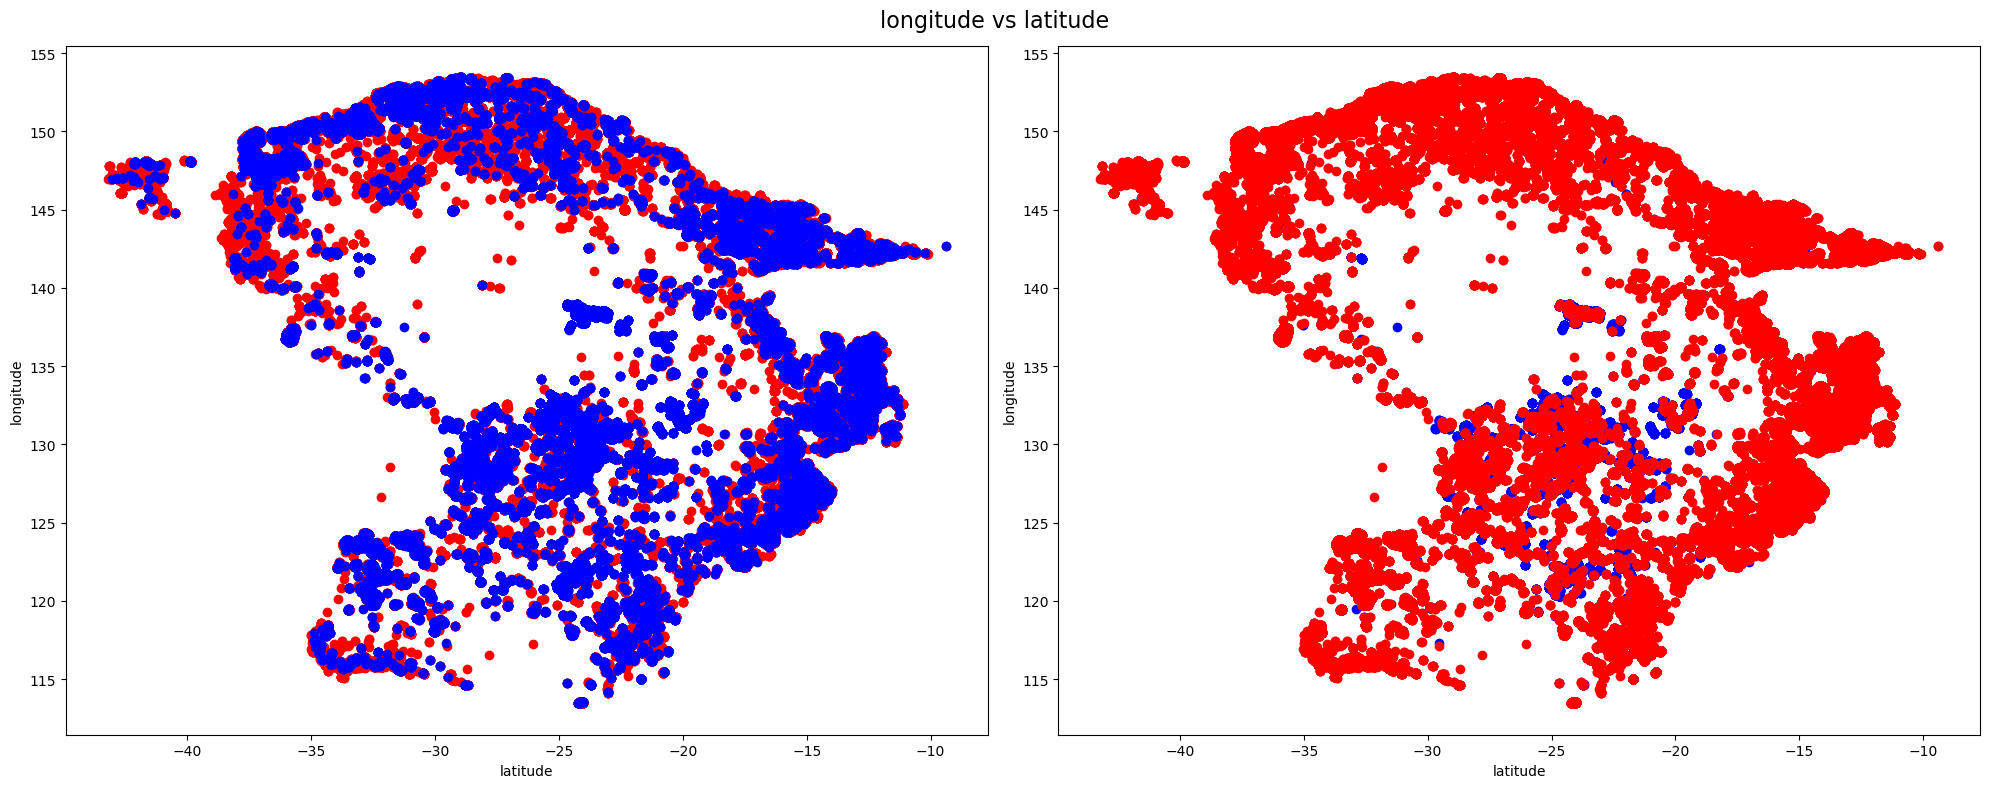

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('longitude vs latitude', fontsize=16)

ax[0].scatter(data1.latitude, data1.longitude, color='red')
ax[0].scatter(data2.latitude, data2.longitude, color='blue')
ax[0].set_xlabel('latitude')
ax[0].set_ylabel('longitude')

ax[1].scatter(data2.latitude, data2.longitude, color='blue')
ax[1].scatter(data1.latitude, data1.longitude, color='red')
ax[1].set_xlabel('latitude')
ax[1].set_ylabel('longitude')
plt.tight_layout()